In [61]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(42)

# #Class 1
# mean = [10,10]
# cov = [[20,0],
#        [0,20]] 
# Class1 = np.random.multivariate_normal(mean,cov,700)

# print(Class1)

# mean = [-10,-10]
# cov = [[20,0],
#        [0,20]] 
# Class2 = np.random.multivariate_normal(mean,cov,700)

# mean = [-10,10]
# cov = [[20,0],
#        [0,20]] 
# Class3 = np.random.multivariate_normal(mean,cov,700)


# feature_set = np.vstack([Class1, Class2, Class3])

# labels = np.array([0]*700 + [1]*700 + [2]*700)

# one_hot_labels = np.zeros((2100, 3))

# for i in range(2100):
#     one_hot_labels[i, labels[i]] = 1

# plt.figure(figsize=(10,7))
# plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
# plt.show()

# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def sigmoid_der(x):
#     return sigmoid(x) *(1-sigmoid (x))

# def softmax(A):
#     expA = np.exp(A)
#     return expA / expA.sum(axis=1, keepdims=True)

# instances = feature_set.shape[0]
# attributes = feature_set.shape[1]
# hidden_nodes = 4
# output_labels = 3

# wh = np.random.rand(attributes,hidden_nodes)
# bh = np.random.randn(hidden_nodes)

# wo = np.random.rand(hidden_nodes,output_labels)
# bo = np.random.randn(output_labels)
# lr = 10e-4

# error_cost = []

# for epoch in range(50000):
# ############# feedforward

#     # Phase 1
#     zh = np.dot(feature_set, wh) + bh
#     ah = sigmoid(zh)

#     # Phase 2
#     zo = np.dot(ah, wo) + bo
#     ao = softmax(zo)

# ########## Back Propagation

# ########## Phase 1

#     dcost_dzo = ao - one_hot_labels
#     dzo_dwo = ah

#     dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

#     dcost_bo = dcost_dzo

# ########## Phases 2

#     dzo_dah = wo
#     dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
#     dah_dzh = sigmoid_der(zh)
#     dzh_dwh = feature_set
#     dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

#     dcost_bh = dcost_dah * dah_dzh

#     # Update Weights ================

#     wh -= lr * dcost_wh
#     bh -= lr * dcost_bh.sum(axis=0)

#     wo -= lr * dcost_wo
#     bo -= lr * dcost_bo.sum(axis=0)

#     if epoch % 200 == 0:
#         loss = np.sum(-one_hot_labels * np.log(ao))
#         print('Loss function value: ', loss)
#         error_cost.append(loss)

In [33]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#plt.style.use('ggplot')

[0 0 0 ... 2 2 2]


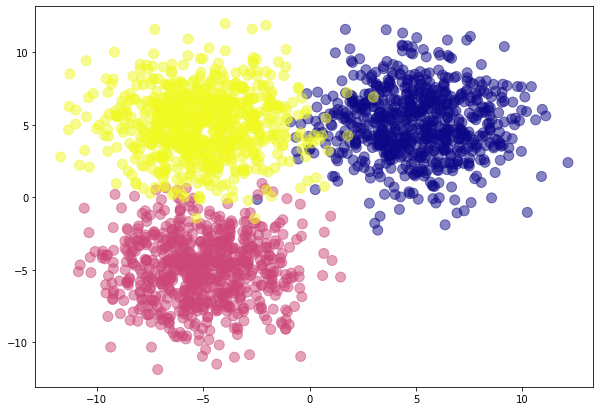

In [39]:
#Class 1
mean = [5,5]
cov = [[5,0],
       [0,5]] 
Class1 = np.random.multivariate_normal(mean,cov,500)

#print(Class1)

#print(Class1)

mean = [-5,-5]
cov = [[5,0],
       [0,5]] 
Class2 = np.random.multivariate_normal(mean,cov,500)

mean = [-5,5]
cov = [[5,0],
       [0,5]] 
Class3 = np.random.multivariate_normal(mean,cov,500)


X = np.vstack([Class1, Class2, Class3])

Y = np.array([0]*500 + [1]*500 + [2]*500)
print(Y)

one_hot_labels = np.zeros((1500, 3))

for i in range(1500):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [46]:
# X_train = feature_set;
# Y_train = labels;

model = Sequential()
model.add(Dense(3, activation = 'relu')) # input layer requires input_dim param
model.add(Dense(16, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation='softmax'))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

Y_train = to_categorical(Y_train)
print(Y_train.shape)
Y_test = to_categorical(Y_test)


(1050, 2) (1050,)
(450, 2) (450,)
(1050, 3)


In [52]:
e = 50
obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=2)

scores = model.evaluate(X_test, Y_test)

#print(model.metrics_names[0], model.metrics_names[1])

#lossValues = np.array

Epoch 1/50
33/33 - 0s - loss: 0.0583 - accuracy: 0.9790
Epoch 2/50
33/33 - 0s - loss: 0.0580 - accuracy: 0.9810
Epoch 3/50
33/33 - 0s - loss: 0.0581 - accuracy: 0.9819
Epoch 4/50
33/33 - 0s - loss: 0.0581 - accuracy: 0.9810
Epoch 5/50
33/33 - 0s - loss: 0.0583 - accuracy: 0.9819
Epoch 6/50
33/33 - 0s - loss: 0.0588 - accuracy: 0.9790
Epoch 7/50
33/33 - 0s - loss: 0.0580 - accuracy: 0.9819
Epoch 8/50
33/33 - 0s - loss: 0.0578 - accuracy: 0.9819
Epoch 9/50
33/33 - 0s - loss: 0.0581 - accuracy: 0.9800
Epoch 10/50
33/33 - 0s - loss: 0.0581 - accuracy: 0.9819
Epoch 11/50
33/33 - 0s - loss: 0.0580 - accuracy: 0.9819
Epoch 12/50
33/33 - 0s - loss: 0.0578 - accuracy: 0.9800
Epoch 13/50
33/33 - 0s - loss: 0.0581 - accuracy: 0.9800
Epoch 14/50
33/33 - 0s - loss: 0.0574 - accuracy: 0.9800
Epoch 15/50
33/33 - 0s - loss: 0.0578 - accuracy: 0.9800
Epoch 16/50
33/33 - 0s - loss: 0.0577 - accuracy: 0.9810
Epoch 17/50
33/33 - 0s - loss: 0.0582 - accuracy: 0.9829
Epoch 18/50
33/33 - 0s - loss: 0.0577 - 

In [58]:
Loss = np.array(obj.history["loss"])
Epoch = np.arange(e)
#print(Loss, Epoch)

[0.05828319 0.05798474 0.05808388 0.05813289 0.05830109 0.05878354
 0.05799946 0.05783423 0.05813298 0.05812852 0.05802197 0.05775107
 0.05814849 0.05741166 0.05783154 0.0577207  0.05818663 0.05765958
 0.05777511 0.0568992  0.05756609 0.0568141  0.05751044 0.05753691
 0.05696179 0.05736977 0.05672235 0.05730671 0.05678615 0.05753103
 0.05626549 0.05688547 0.05621533 0.05709449 0.05606429 0.05638837
 0.05631986 0.05586968 0.05696993 0.05626027 0.05599789 0.05543469
 0.05591871 0.05586126 0.05546585 0.05589928 0.05552896 0.05669327
 0.05548075 0.05542933] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


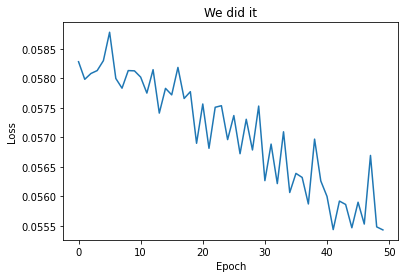

In [60]:
plt.plot(Epoch, Loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("We did it")
plt.show()